<a href="https://colab.research.google.com/github/TurkiAlghusoon/Portfolio/blob/main/7_loan_default_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this problem, the goal is to build a logistic regression model to predict laon default using individuals' FICO scores

In [2]:
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas.errors import SettingWithCopyWarning
import sklearn

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIT XPro/Assignments/7_Loan Default - Logistic Regression/loans.csv')

In [7]:
#Dropping extra columns from the dataset
df.drop(labels=['installment', 'log_income', 'rev_balance', 'inquiries', 'records'], axis=1, inplace = True)

###### Examining the data

In [8]:
df.head(6)

,default,fico_score
0,0,737
1,0,707
2,0,682
3,0,712
4,0,667
5,0,727


In [9]:
df.tail(6)

,default,fico_score
9510,1,662
9511,1,672
9512,1,722
9513,1,687
9514,1,692
9515,1,732


In [24]:
# describing the subset of where loans defaulted:
df.loc[df['default']==1,:].describe()

,default,fico_score
count,1521.0,1521.000000
mean,1.0,697.884287
std,0.0,33.764233
min,1.0,617.000000
25%,1.0,672.000000
50%,1.0,692.000000
75%,1.0,717.000000
max,1.0,822.000000


In [27]:
# describin the subset where loans did not default
df.loc[df['default'] != 1, :].describe()


,default,fico_score
count,7995.0,7995.000000
mean,0.0,713.307067
std,0.0,38.209948
min,0.0,612.000000
25%,0.0,682.000000
50%,0.0,707.000000
75%,0.0,742.000000
max,0.0,827.000000


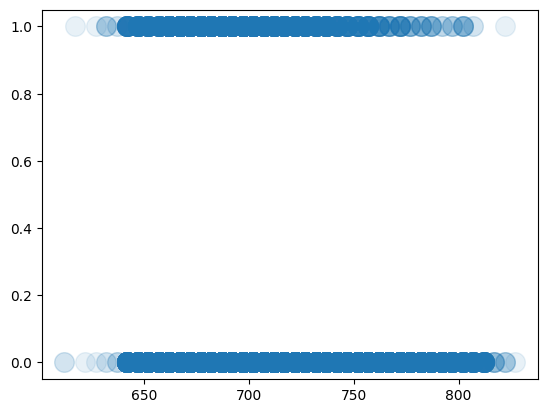

In [28]:
#Creating a scatterplot to visualze the FICO score spread for default and non-defaults
plot = plt.scatter(df['fico_score'], df['default'],alpha =0.1, s=200)
points = plot.get_offsets()


In [29]:
#Split data into train and test
df_train, df_test = train_test_split(df,test_size=0.3)

In [30]:
df_train.describe()

,default,fico_score
count,6661.000000,6661.000000
mean,0.158685,711.057199
std,0.365409,38.111834
min,0.000000,612.000000
25%,0.000000,682.000000
50%,0.000000,707.000000
75%,0.000000,737.000000
max,1.000000,827.000000


In [31]:
#Building a logistic Regression model to predict default probability based on FICO score
model = logit('default ~ fico_score',df_train)

est = model.fit()

print(est.summary())

Optimization terminated successfully.
         Current function value: 0.426362
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 6661
Model:                          Logit   Df Residuals:                     6659
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                 0.02542
Time:                        22:31:57   Log-Likelihood:                -2840.0
converged:                       True   LL-Null:                       -2914.1
Covariance Type:            nonrobust   LLR p-value:                 4.415e-34
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4098      0.689      9.305      0.000       5.060       7.760
fico_score    -0.0114      0.

In [32]:
# Using the model to create a predicted probability of default from the df_test dataframe and capturing the data as a new column in the test dataframe

pred = est.predict(df_test)
df_test['predicted_probability'] = pred
df_test.head(6)


,default,fico_score,predicted_probability
796,1,677,0.207410
7272,0,742,0.110589
9164,0,732,0.122361
2029,0,687,0.189220
6783,0,772,0.081048
1973,0,667,0.226861


In [33]:
# Creating a new column "will_default" to determine default classification based on pre-established probability threshold (30%)

df_test['will_default'] = np.where(df_test['predicted_probability'] >= 0.3, 1, 0)
cm = confusion_matrix(df_test['default'],df_test['will_default'])
profit = (cm[0,0]*1000) + (cm[0,1]*(-5000))
print(f'profit at 30%: {profit}; Accuracy at 30%:{accuracy_score(df_test.default,df_test.will_default)}\n')
print(df_test)

profit at 30%: 2385000; Accuracy at 30%:0.8371278458844134

      default  fico_score  predicted_probability  will_default
796         1         677               0.207410             0
7272        0         742               0.110589             0
9164        0         732               0.122361             0
2029        0         687               0.189220             0
6783        0         772               0.081048             0
...       ...         ...                    ...           ...
2477        0         717               0.142030             0
3201        0         742               0.110589             0
2840        0         672               0.216978             0
6551        1         737               0.116346             0
8183        0         657               0.247565             0

[2855 rows x 4 columns]


In [34]:
# Creating a confusion matrix displaying actual vs predicted values.

matrix = confusion_matrix(df_test['default'],df_test['will_default'])

print(matrix)

[[2390    1]
 [ 464    0]]


<Axes: >

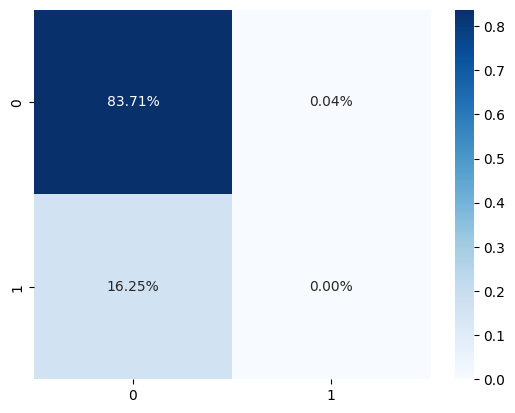

In [35]:
#Calculating the percentage of true positive, true negatives, false positives, and false negatives for the classification threshold

sns.heatmap(matrix/np.sum(matrix), annot=True,
            fmt='.2%', cmap='Blues')

<Axes: >

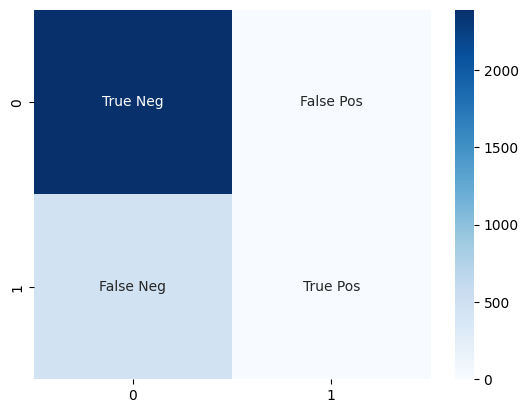

In [36]:
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt="", cmap='Blues')

In [37]:
#Caculating the overall accuracy score for the model at the 30% threshold
print('Accuracy:'+str(accuracy_score(df_test['default'], df_test['will_default'])))

Accuracy:0.8371278458844134
